### Introduction: 
In this notebook we will compare the results of running and simulating identical circuits using Qiskit (IBMs platform) and Qsim our developed simulator. Feel free to change the code in the circuit section to vary the circuits you compare, just make sure you construct the same circuit on both platforms

In [1]:
from qsim import qsim
from qiskit import *

In [10]:
# initializing a quantum circuit using qsim: 
qsim_circ = qsim.Circuit(2)
print('This is the qsim circuit:')  
print(qsim_circ)

# ------------------------------------------------

# initializing a quantum circuit using qiskit:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qiskit_circ = QuantumCircuit(qr, cr)
print('This is the qiskit circuit:')
qiskit_circ.draw()


This is the qsim circuit:
q0: |0>----M
q1: |0>----M

This is the qiskit circuit:


q2_0: 
      
q2_1: 
      
c2_0: 
      
c2_1:

### Circuit Generation: 
In this section we generate a circuit to compare the two simulators. Specifically, we generate a circuit to entangle the 0th qbit and the 1st qbit. 


In [11]:
# Customize Circuit Here! 
qsim_circ.h(0)           # apply hadamard gate to 0th qbit 
qsim_circ.cx(0,1)        # apply a cnot gate to 0th qbit and 1st qbit 
print(qsim_circ)

# -----------------------------------------------------------------

qiskit_circ.h(qr[0])
qiskit_circ.cx(qr[0], qr[1])
qiskit_circ.draw()


q0: |0>--H--CQ---M
q1: |0>-----TX---M



┌───┐     
q2_0: ┤ H ├──■──
      └───┘┌─┴─┐
q2_1: ─────┤ X ├
           └───┘
c2_0: ══════════
                
c2_1: ══════════

### Results: 
In this section we compare the results of circuit for each simulator. Specifically, we will compare the state vector determined by each simulator. We will also plot a histogram of measurements (which are derived from the state vectors) for a more visual confirmation.

In [12]:
# display the state vectors for each circuit 
qsim_circ.run(status=False)
print('state vector from qsim: {}'.format(qsim_circ.circuit_state))

# ---------------------------------------------

backend = Aer.get_backend('statevector_simulator')
job = execute(qiskit_circ, backend)
result = job.result()
qiskit_circuit_state = result.get_statevector(qiskit_circ, decimals=3)
print('state vector from qiskit: {}'.format(qiskit_circuit_state))


state vector from qsim: [0.70710678 0.         0.         0.70710678]
state vector from qiskit: [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


{'00': 508, '01': 0, '10': 0, '11': 516}


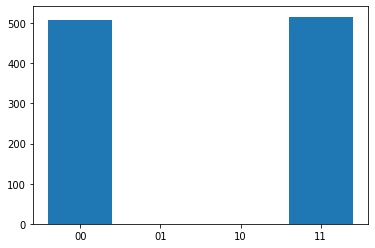

{'00': 505, '11': 519}


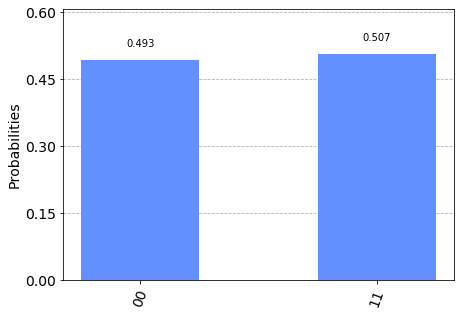

In [13]:
# plot 1024 simulated measurements of circuits:
counts = qsim_circ.simulate(shots=1024)
print(counts)

qsim_circ.plot_counts(counts)

# -----------------------------------------------
backend_sim = Aer.get_backend('qasm_simulator')
qiskit_circ.measure(range(2), range(2))
job_sim = execute(qiskit_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qiskit_circ)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)